In [1]:
%matplotlib inline

import pandas as pd
from scipy import stats
import seaborn as sns
from stemgraphic import stem_graphic

# External data

Let's get some medicare payment data CY2012 from cms.gov

In [2]:
!wget http://download.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/Medicare_Provider_Util_Payment_PUF_CY2012_update.zip

--2016-09-13 11:44:32--  http://download.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/Medicare_Provider_Util_Payment_PUF_CY2012_update.zip
Resolving download.cms.gov... 204.156.15.130, 204.156.15.106, 2001:5014:703::3f82:4e09, ...
Connecting to download.cms.gov|204.156.15.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 467801269 (446M) [application/zip]
Saving to: “Medicare_Provider_Util_Payment_PUF_CY2012_update.zip”

100%[======================================>] 467,801,269 3.82M/s   in 2m 44s  

2016-09-13 11:47:16 (2.72 MB/s) - “Medicare_Provider_Util_Payment_PUF_CY2012_update.zip” saved [467801269/467801269]



In [3]:
!unzip -o Medicare_Provider_Util_Payment_PUF_CY2012_update.zip

Archive:  Medicare_Provider_Util_Payment_PUF_CY2012_update.zip
  inflating: CMS_AMA_CPT_license_agreement.pdf  
  inflating: Medicare-Physician-and-Other-Supplier-PUF-SAS-Infile.sas  
  inflating: Medicare_Provider_Util_Payment_PUF_CY2012.txt  


In [4]:
df = pd.read_table("Medicare_Provider_Util_Payment_PUF_CY2012.txt", skiprows=[1], header=0)

/usr/local/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
df.describe()

,NPI,LINE_SRVC_CNT,BENE_UNIQUE_CNT,BENE_DAY_SRVC_CNT,AVERAGE_MEDICARE_ALLOWED_AMT,STDEV_MEDICARE_ALLOWED_AMT,AVERAGE_SUBMITTED_CHRG_AMT,STDEV_SUBMITTED_CHRG_AMT,AVERAGE_MEDICARE_PAYMENT_AMT,STDEV_MEDICARE_PAYMENT_AMT
count,9.153272e+06,9.153272e+06,9.153272e+06,9.153272e+06,9.153272e+06,9.153272e+06,9.153272e+06,9.153272e+06,9.153272e+06,9.153272e+06
mean,1.499546e+09,2.397031e+02,9.119919e+01,1.509448e+02,9.628829e+01,6.568267e+00,2.981586e+02,2.229884e+01,7.490089e+01,1.240657e+01
std,2.878767e+08,5.104884e+03,1.137321e+03,2.180008e+03,2.033851e+02,4.855068e+01,7.913027e+02,1.611956e+02,1.610363e+02,4.157077e+01
min,1.003000e+09,6.000000e+00,1.100000e+01,1.100000e+01,3.333330e-05,0.000000e+00,3.333330e-05,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.245479e+09,2.100000e+01,1.700000e+01,2.000000e+01,2.179000e+01,0.000000e+00,5.000000e+01,0.000000e+00,1.747260e+01,4.654928e-02
50%,1.497931e+09,4.500000e+01,3.300000e+01,4.200000e+01,6.019000e+01,0.000000e+00,1.228000e+02,0.000000e+00,4.457513e+01,4.978978e+00
75%,1.740553e+09,1.240000e+02,7.700000e+01,1.110000e+02,1.086000e+02,7.577722e-01,2.525000e+02,3.492409e+00,8.233045e+01,1.581299e+01
max,1.993000e+09,4.578582e+06,6.046340e+05,1.227047e+06,4.627252e+04,4.480343e+04,9.800000e+04,5.319586e+04,3.701232e+04,3.583923e+04


## Distribution plots

In [6]:
nebulizer = df[df.HCPCS_CODE=='94640']

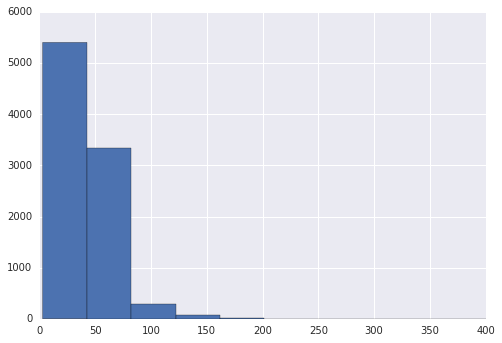

In [7]:
nebulizer['AVERAGE_SUBMITTED_CHRG_AMT'].hist()

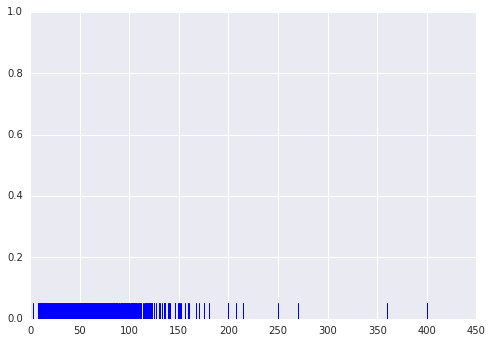

In [8]:
sns.rugplot(nebulizer['AVERAGE_SUBMITTED_CHRG_AMT'])

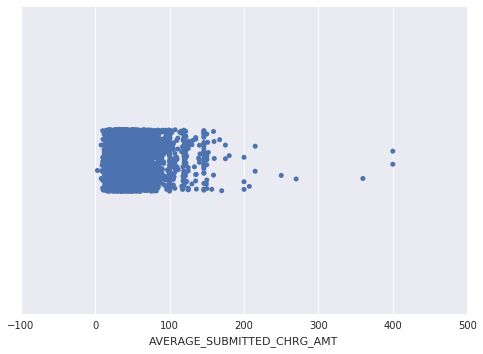

In [9]:
sns.stripplot(nebulizer['AVERAGE_SUBMITTED_CHRG_AMT'], jitter=True)

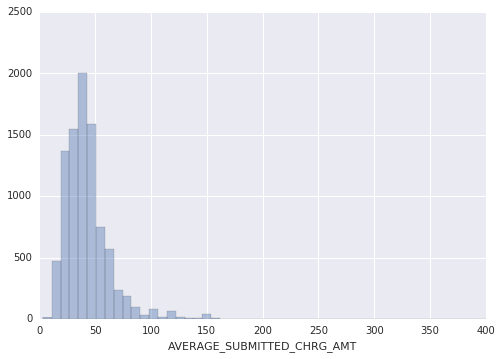

In [10]:
sns.distplot(nebulizer['AVERAGE_SUBMITTED_CHRG_AMT'], kde=False)

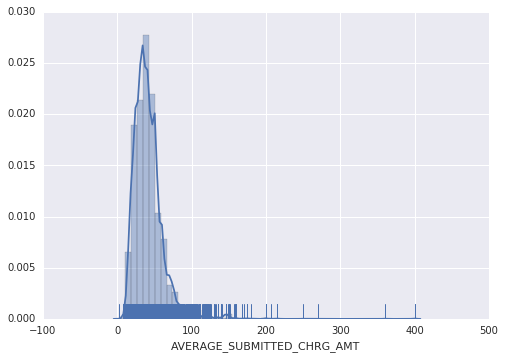

In [11]:
sns.distplot(nebulizer['AVERAGE_SUBMITTED_CHRG_AMT'], rug=True)

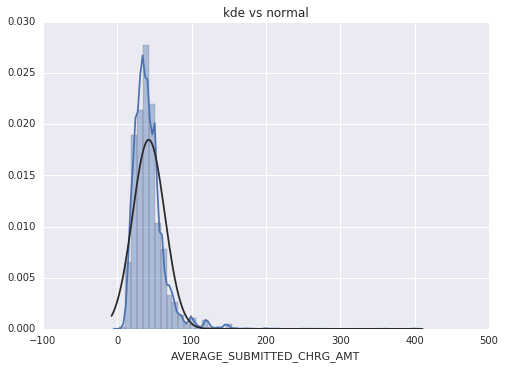

In [12]:
ax = sns.distplot(df[df.HCPCS_CODE=='94640']['AVERAGE_SUBMITTED_CHRG_AMT'], fit=stats.norm)
ax.set_title('kde vs normal')

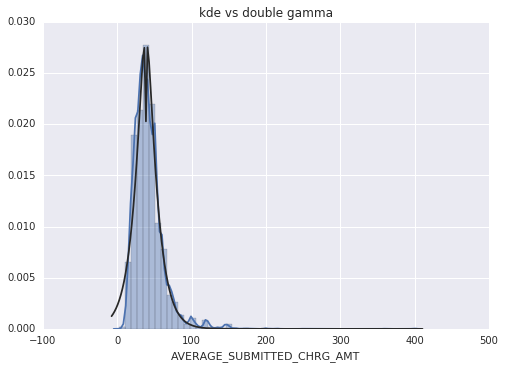

In [13]:
ax = sns.distplot(df[df.HCPCS_CODE=='94640']['AVERAGE_SUBMITTED_CHRG_AMT'], fit=stats.dgamma)
ax.set_title('kde vs double gamma')

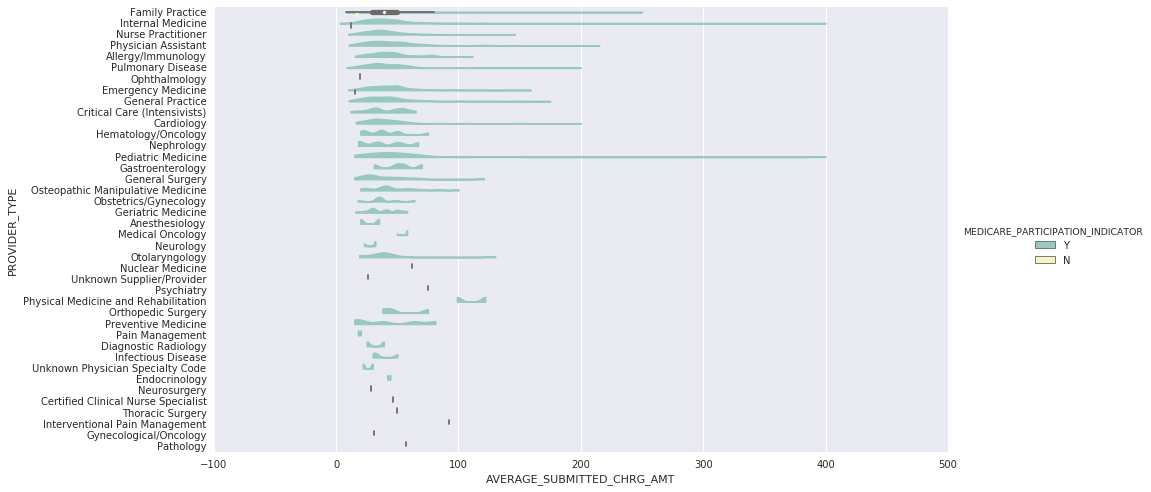

In [14]:
g = sns.factorplot(x='AVERAGE_SUBMITTED_CHRG_AMT', y='PROVIDER_TYPE',
                   data=nebulizer[nebulizer.AVERAGE_SUBMITTED_CHRG_AMT>0],
                   hue='MEDICARE_PARTICIPATION_INDICATOR', split=True, kind='violin',
                   orient="h", size=7, aspect=2, palette="Set3", bw=.2, cut=0)  

In [15]:
sub_nebulizer = nebulizer[nebulizer.PROVIDER_TYPE.isin(['Pediatric Medicine','Pulmonary Disease', 'Family Practice','Emergency Medicine'])]

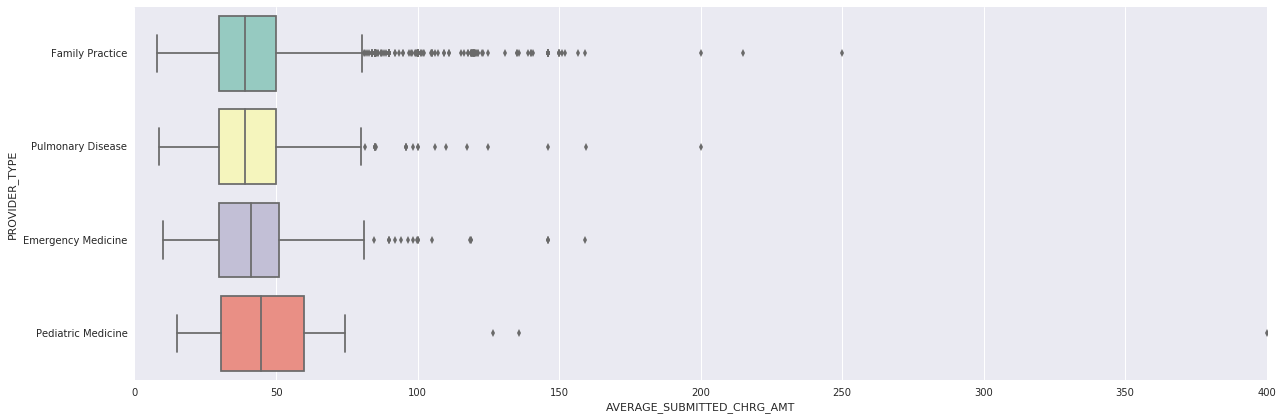

In [16]:
g = sns.factorplot(x='AVERAGE_SUBMITTED_CHRG_AMT', y='PROVIDER_TYPE',
                   data=sub_nebulizer, kind='box',
                   orient="h", size=6, aspect=3, palette="Set3")  

(<matplotlib.figure.Figure at 0x7fb2f5dc3f60>,
 <matplotlib.axes._axes.Axes at 0x7fb2f641c080>)

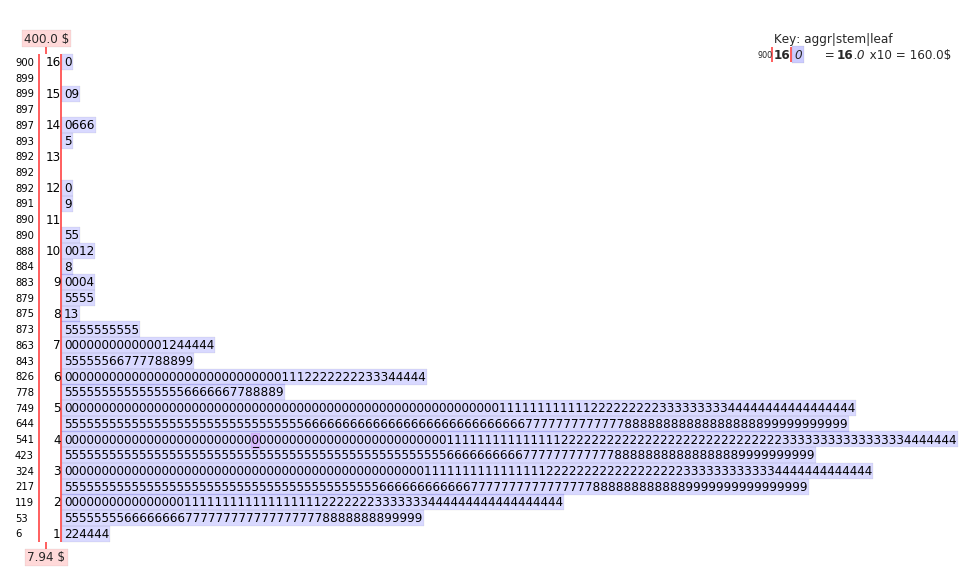

In [18]:
stem_graphic(sub_nebulizer['AVERAGE_SUBMITTED_CHRG_AMT'], unit='$')